In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import random
import seaborn as sns
from matplotlib import rcParams
#rcParams['figure.figsize'] = 12,6

Plot of dataset for question 1


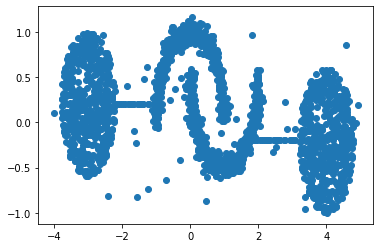

In [9]:
filename_Q1_data = open('dbscan2000.pkl','rb')
Q1_data = pickle.load(filename_Q1_data)
print('Plot of dataset for question 1')
plt.scatter(Q1_data[:,0], Q1_data[:,1])
plt.savefig('Q1_dataPlot.png')
plt.show()

Plot of dataset for question 2


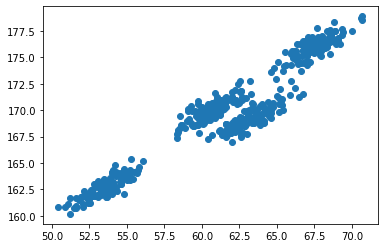

In [10]:
Q2_data = pd.read_csv('Clustering_gmm.csv')
print('Plot of dataset for question 2')
plt.scatter(Q2_data['Weight'], Q2_data['Height'])
plt.savefig('Q2_dataPlot.png')
plt.show()

In [11]:
# here we will use 0 - noise, -1 for border, -2 for core
def dbscan(data, epsilon, minPoints):
    """
    data :- dataset in numpy array format
    epsilon :- the maximum distance required 
    minPoints :- minimum number of points required
    Return value : this function returns 
         1. classification : an array with classification labels corresponding to the given data
         2. total_clusters : total number of clusters found in the dataset
    """
    classification = [0]*len(data)

    def find_neighbours(current_point_ID , data, epsilon):
        """
        this function will be used to find points which are at most a distance of epsilon from the given point
        """
        # array for storing neighbouring points
        neighbours = []
        # finding the distance between each data point and the given point 
        for i in range(len(data)):
            # here we will use eucledian distance
            distance = np.linalg.norm([x - y for x, y in zip(data[i], data[current_point_ID])])
            if  distance <= epsilon:
                neighbours.append(i)
        return neighbours    
    
    # array for storing neighbours of all points
    all_neighbours = []
    for i in range(len(classification)):
        all_neighbours.append(find_neighbours(i,data,epsilon))
    
    # array for storing core points
    core_points  = []
    # array for storing points that are not core
    non_core_points = []
    # Classifying points as core or non core
    for i in range(len(all_neighbours)):
        if (len(all_neighbours[i]) >= minPoints):
            core_points.append(i)
            # labelling the corresponding point as core
            classification[i] = -2
        else:
            non_core_points.append(i)
            
    # Labelling the border points
    for j in non_core_points :
        neighbours_of_j = all_neighbours[j]
        for k in neighbours_of_j:
            if k in core_points:
                classification[j] = -1
                break

    
    CBN_classification = classification.copy()
    # Traversing through all points and classifying them into clusters.
    # Note clusters will be labelled as 1,2,3... etc
    current_cluster = 1
    for i in range(len(classification)):
        traverse_list = []
        if (classification[i]==-2):
            classification[i]=current_cluster
            for j in all_neighbours[i]:
                if(classification[j]==-1):
                    classification[j]=current_cluster
                if(classification[j]==-2):
                    classification[j]=current_cluster
                    traverse_list.append(j)
            while(len(traverse_list)!=0):
                for j in all_neighbours[traverse_list.pop(0)]:
                    if(classification[j]==-1):
                        classification[j]=current_cluster
                    if(classification[j]==-2):
                        classification[j]=current_cluster
                        traverse_list.append(j)
            current_cluster = current_cluster + 1
            
    total_clusters  = current_cluster-1
            
    return classification, total_clusters, CBN_classification
                
                
        
        

Paramaters are EPSILON = 0.15, MINIMUM POINTS = 5
Plot for classification of points into core, border and noise


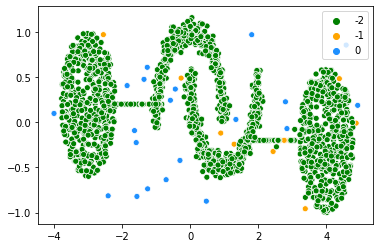

Plot of clustering for question 1


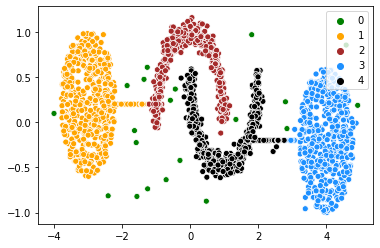

In [12]:
clas, clus, CBN = dbscan(Q1_data, 0.15, 5)
print('Paramaters are EPSILON = 0.15, MINIMUM POINTS = 5')
print('Plot for classification of points into core, border and noise')
sns.scatterplot(x = Q1_data[:,0], y = Q1_data[:,1], hue = CBN, palette=['green','orange','dodgerblue'])
plt.show()
print('Plot of clustering for question 1')
sns.scatterplot(x = Q1_data[:,0], y = Q1_data[:,1], hue = clas, palette=['green','orange','brown','dodgerblue','black'])
plt.show()

Paramaters are EPSILON = 0.5, MINIMUM POINTS = 10
Plot for classification of points into core, border and noise


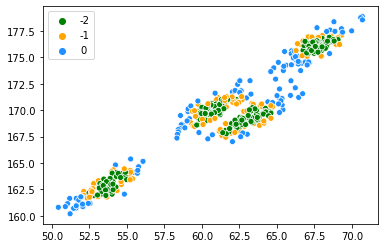

Plot of clustering for question 2


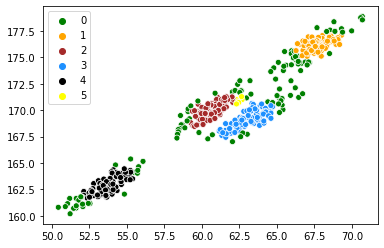

In [13]:
Q2_data = np.array(Q2_data)
clas, clus, CBN = dbscan(Q2_data, 0.5, 10)
print('Paramaters are EPSILON = 0.5, MINIMUM POINTS = 10')
print('Plot for classification of points into core, border and noise')
sns.scatterplot(x = Q2_data[:,0], y = Q2_data[:,1], hue = CBN, palette=['green','orange','dodgerblue'])
plt.show()
print('Plot of clustering for question 2')
sns.scatterplot(x = Q2_data[:,0], y = Q2_data[:,1], hue = clas, palette=['green','orange','brown','dodgerblue','black','yellow'])
plt.show()

Paramaters are EPSILON = 0.63, MINIMUM POINTS = 4
Plot for classification of points into core, border and noise


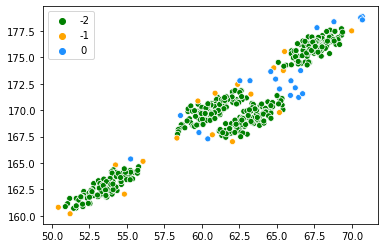

Plot of clustering for question 2


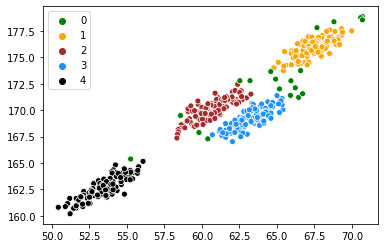

In [14]:
Q2_data = np.array(Q2_data)
clas, clus, CBN = dbscan(Q2_data, 0.63, 4)
print('Paramaters are EPSILON = 0.63, MINIMUM POINTS = 4')
print('Plot for classification of points into core, border and noise')
sns.scatterplot(x = Q2_data[:,0], y = Q2_data[:,1], hue = CBN, palette=['green','orange','dodgerblue'])
plt.show()
print('Plot of clustering for question 2')
sns.scatterplot(x = Q2_data[:,0], y = Q2_data[:,1], hue = clas, palette=['green','orange','brown','dodgerblue','black'])
plt.show()
